<a href="https://colab.research.google.com/github/hunarbatra/YOLOv3-KITTI/blob/master/yolo_kitti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/costimasca/yolo-kitti.git

Cloning into 'yolo-kitti'...
remote: Enumerating objects: 1262, done.
remote: Total 1262 (delta 0), reused 0 (delta 0), pack-reused 1262
Receiving objects: 100% (1262/1262), 179.54 MiB | 34.28 MiB/s, done.


In [2]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5901, done.
remote: Total 5901 (delta 0), reused 0 (delta 0), pack-reused 5901
Receiving objects: 100% (5901/5901), 6.16 MiB | 21.45 MiB/s, done.
Resolving deltas: 100% (3922/3922), done.


In [3]:
%cd darknet

/content/darknet


In [4]:
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

In [0]:
!cp /content/yolo-kitti/kitti.data /content/darknet/cfg

In [0]:
!cp /content/yolo-kitti/kitti.cfg /content/darknet/cfg

In [0]:
!cp /content/yolo-kitti/vehicle.names /content/darknet/data

In [0]:
!cp /content/yolo-kitti/000031.jpg /content/darknet

In [0]:
!cp /content/yolo-kitti/000032.jpg /content/darknet

In [11]:
%cd ..
%cd yolo-kitti

/content
/content/yolo-kitti


In [0]:
!cat weights/* > kitti.weights

In [13]:
%cd ..
%cd darknet

/content
/content/darknet


In [0]:
!cp /content/yolo-kitti/kitti.weights /content/darknet

In [0]:
!cp /content/yolo-kitti/vehicle.names /content/darknet

In [20]:
!./darknet detector test cfg/kitti.data cfg/kitti.cfg kitti.weights 000031.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 max          2 x 2 / 2   608 x 608 x  32   ->   304 x 304 x  32
    2 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    3 max          2 x 2 / 2   304 x 304 x  64   ->   152 x 152 x  64
    4 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    5 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    6 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    7 max          2 x 2 / 2   152 x 152 x 128   ->    76 x  76 x 128
    8 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
    9 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128  0.379 BFLOPs
   10 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
   11 max          2 x 2 / 2    76 x  76 x 256   ->

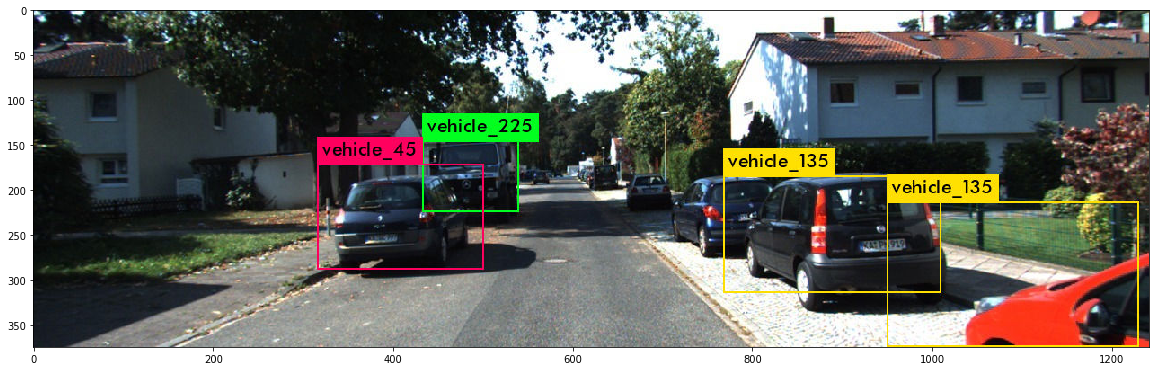

In [21]:
import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline
testim = mpimg.imread('predictions.jpg')
plt.figure(figsize=(20,10))
imshow(testim)